In [1]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make sure the 'COM#' is set according the Windows Device Manager
ser = serial.Serial('COM4', 2_000_000, timeout=1)

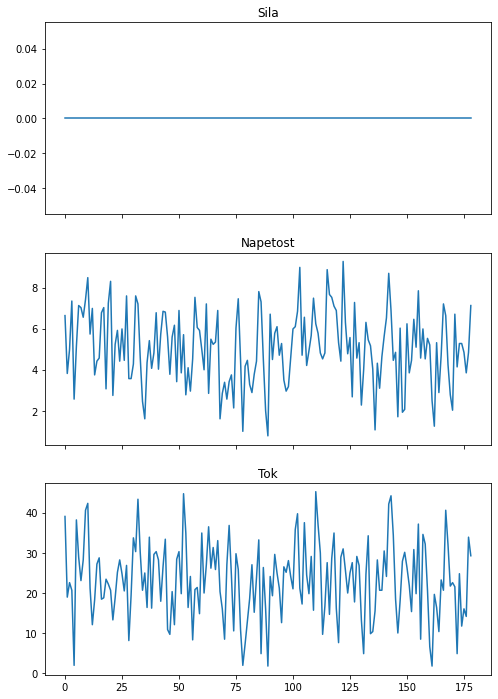

In [3]:
cas_meritve = 5

data = []
t_start = time.time()

ser.reset_input_buffer()

while time.time() < t_start + cas_meritve:
    line = ser.readline()   # read a byte
    if line:
        string = line.decode()  # convert the byte string to a unicode string
        measure = string.rstrip().split('\t')
        data.append(measure)
        # num = int(string) # convert the unicode string to an int
        # print(num)

data = data[1:]

data = [i for i in data if len(i) == 4]


measurement = np.array(data, dtype=np.object0).astype(np.float64)


fig, axs = plt.subplots(3,1, figsize=(8,12), sharex=True)

ax = axs[0]
ax.set_title('Sila')
ax.plot(measurement[:, 0])

ax = axs[1]
ax.set_title('Napetost')
ax.plot(measurement[:, 2])

ax = axs[2]
ax.set_title('Tok')
ax.plot(measurement[:, 3])

In [4]:
fname = 'sproba.txt'
np.savetxt(fname, measurement, header='sila, hitrost, napetost [V], tok [A]')